In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree ,DecisionTreeClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('shop_smart_ecommerce.csv')
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [3]:
X = df.drop('Revenue',axis=1)
y = df['Revenue']

X['VisitorType'].value_counts()
X['VisitorType'].unique()
X['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [4]:
le = LabelEncoder()
X['Weekend']=le.fit_transform(X['Weekend'])

X = pd.get_dummies(X, columns=['VisitorType','Month'], drop_first=True,dtype=int)

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0


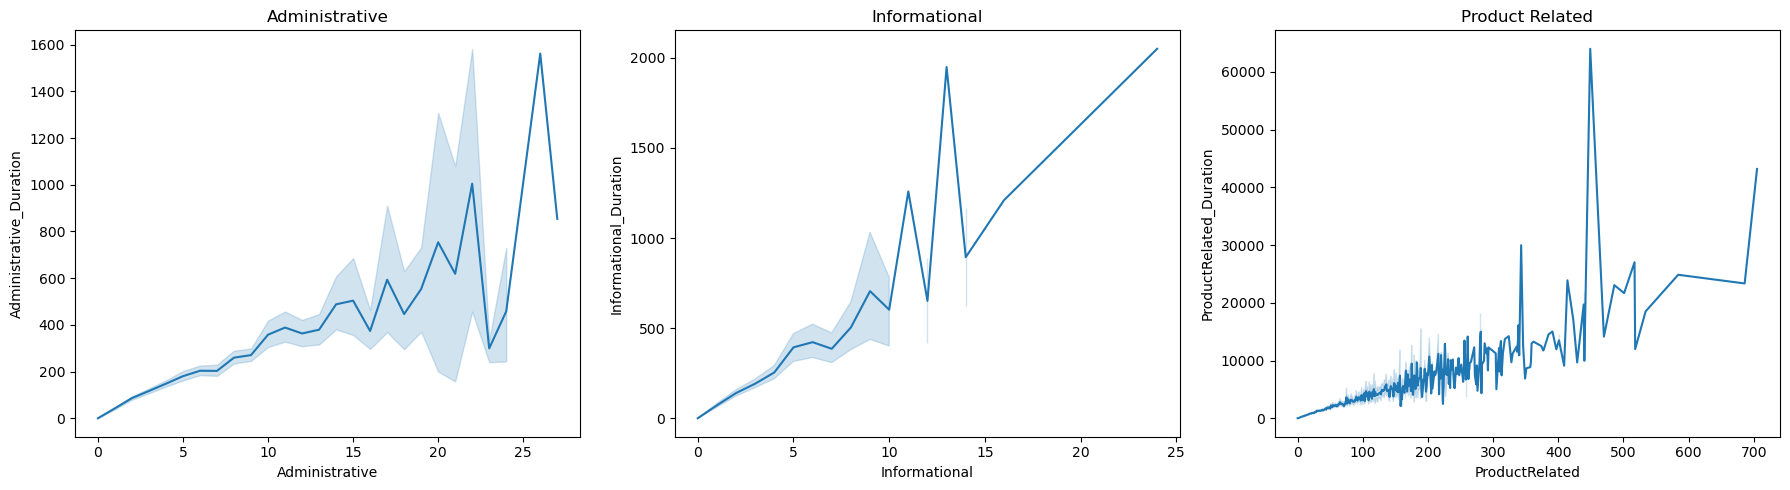

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(
    data=df,
    x='Administrative',
    y='Administrative_Duration',
    ax=axes[0]
)
axes[0].set_title('Administrative')

sns.lineplot(
    data=df,
    x='Informational',
    y='Informational_Duration',
    ax=axes[1]
)
axes[1].set_title('Informational')

sns.lineplot(
    data=df,
    x='ProductRelated',
    y='ProductRelated_Duration',
    ax=axes[2]
)
axes[2].set_title('Product Related')

plt.tight_layout()
plt.show()


<Axes: xlabel='Month', ylabel='SpecialDay'>

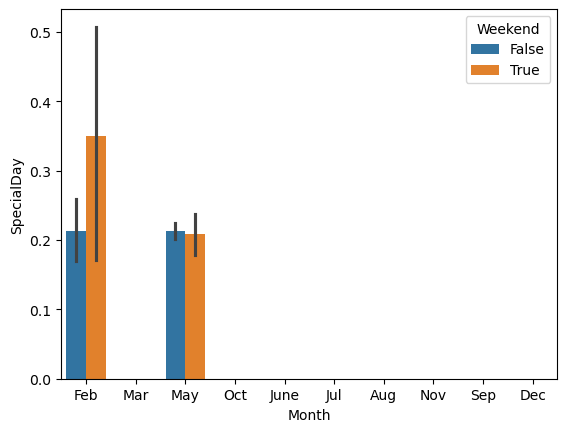

In [6]:
sns.barplot(
    data=df,
    x = 'Month',
    y ='SpecialDay',
    hue = 'Weekend'
)
    

<Axes: xlabel='TrafficType', ylabel='VisitorType'>

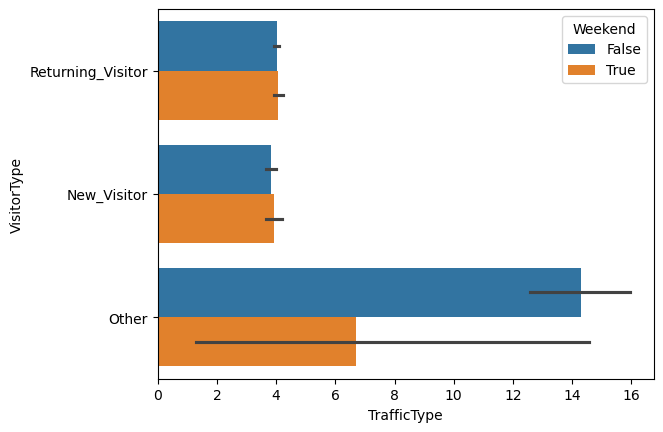

In [7]:
sns.barplot(
    data=df,
    x = 'TrafficType',
    y ='VisitorType',
    hue = 'Weekend'

) 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.55, random_state=42
)

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred = model.predict(X_test)

accuracy at depth 2 =  0.8901503981126512
accuracy at depth 3 =  0.897817752875258
accuracy at depth 4 =  0.9012090828664111
accuracy at depth 5 =  0.8997345915659097
accuracy at depth 6 =  0.8984075493954585
accuracy at depth 7 =  0.8961958124447066
accuracy at depth 8 =  0.8916248894131524
accuracy at depth 9 =  0.8913299911530522
accuracy at depth 10 =  0.8846947803007962


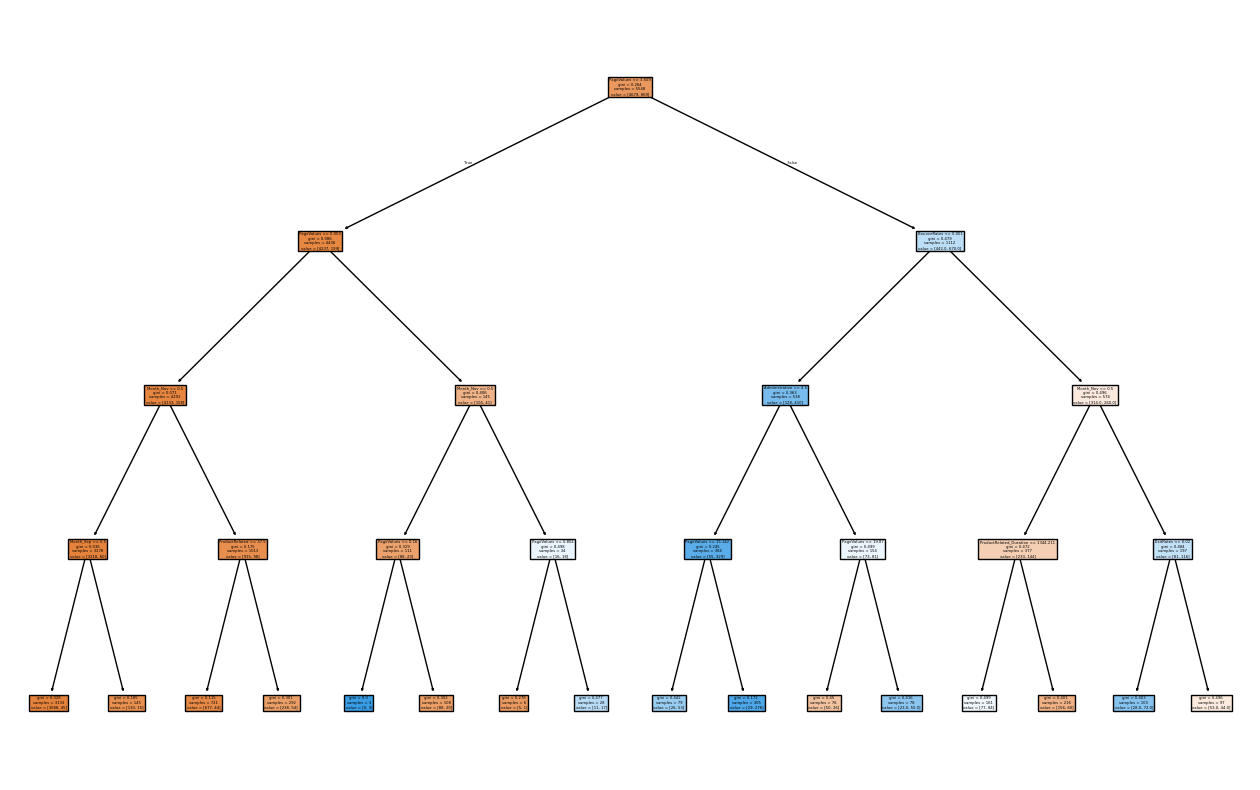

In [11]:
max_depth=[2,3,4,5,6,7,8,9,10]

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train,y_train)
    acc= model.score(X_test,y_test)
    print(f"accuracy at depth {depth} = ",acc)

    if depth ==4:
        plt.figure(figsize=(16,10))
        plot_tree(
            model,
            feature_names=X.columns,
            filled =True
        )

accuracy at split 5 =  0.9012090828664111
accuracy at split 10 =  0.9012090828664111
accuracy at split 20 =  0.9012090828664111
accuracy at split 50 =  0.901061633736361
accuracy at split 100 =  0.901061633736361
accuracy at split 200 =  0.8961958124447066
accuracy at split 400 =  0.8967856089649071
accuracy at split 600 =  0.8901503981126512
accuracy at split 800 =  0.8901503981126512
accuracy at split 1000 =  0.8901503981126512


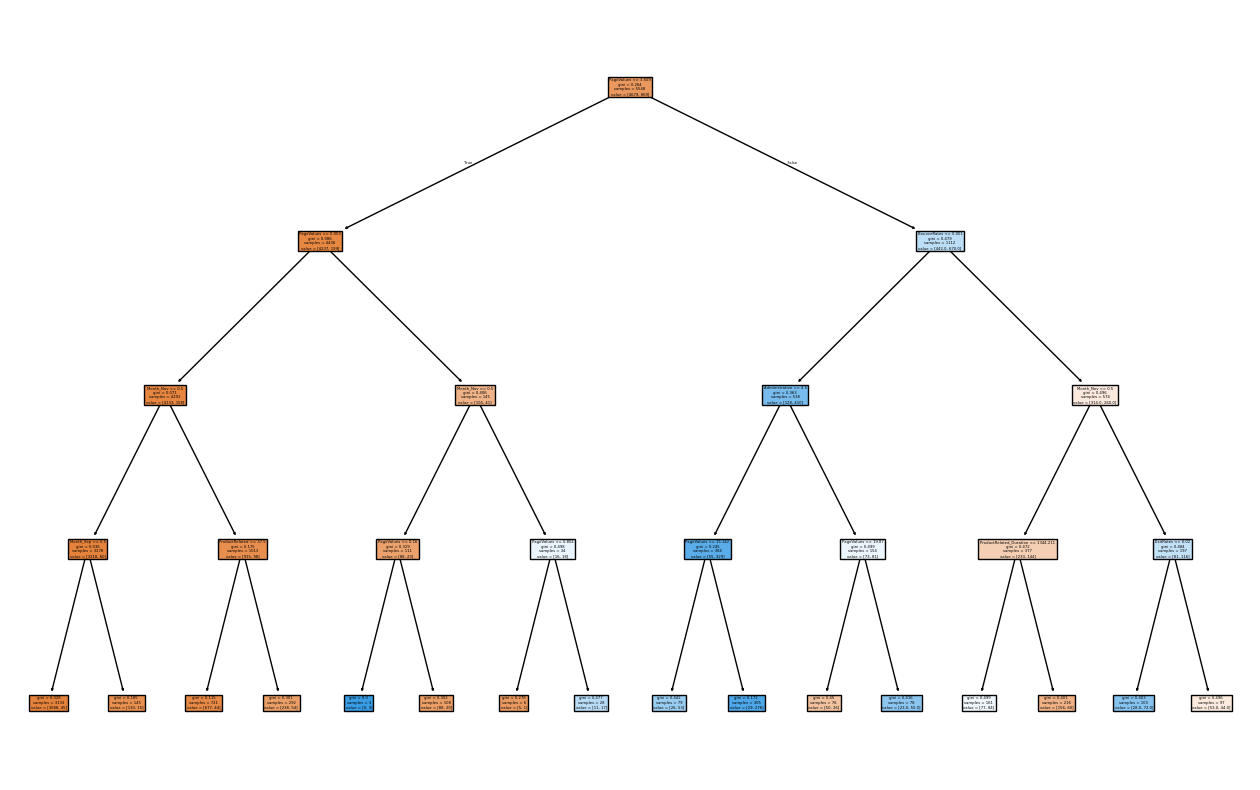

In [12]:
samples_split = [5,10,20,50,100,200,400,600,800,1000]

for split in samples_split:
    model = DecisionTreeClassifier(max_depth=4,min_samples_split=split)
    model.fit(X_train,y_train)
    acc= model.score(X_test,y_test)
    print(f"accuracy at split {split} = ",acc)

    if split == 10:
        plt.figure(figsize=(16,10))
        plot_tree(
            model,
            feature_names=X.columns,
            filled =True
        )

In [13]:
model = DecisionTreeClassifier(max_depth=4,min_samples_split=20,random_state=42)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas =path.ccp_alphas
print(ccp_alphas)

[0.         0.0003456  0.00039648 0.00069861 0.00097407 0.00115022
 0.00123891 0.00125962 0.00171637 0.00182873 0.00197913 0.0019961
 0.00305828 0.00433597 0.00956616 0.09967561]


In [15]:
trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(max_depth=4,min_samples_split=20,random_state=42,ccp_alpha = alpha)
    model.fit(X_train,y_train)
    trees.append((model,alpha))

In [16]:
best_acc = 0
best_alpha = 0

for model,alpha in trees:
    model.fit(X_train,y_train)
    curr_acc =model.score(X_test,y_test)
    
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha


In [17]:
best_alpha

np.float64(0.0)

In [18]:
print(f1_score(y_test,y_pred))

0.5694050991501416
